## 預試資料內容: 學校版

In [12]:
#匯入套件
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt  

### [匯入資料]

In [13]:
#存成utf8_sig格式的csv檔
#artical_0901_1115school.to_csv("artical_0901_1115school.csv", encoding = "utf_8_sig")
#artical_0901_1115topic.to_csv("artical_0901_1115topic.csv", encoding = "utf_8_sig")
# 讀入 csv 文字檔
csv_file = "artical_0901_1115school.csv"
input_artical = pd.read_csv(csv_file) 
print(input_artical.shape)
input_artical.head()

(77555, 11)


,Unnamed: 0,id,content,createdAt,commentCount,forumName,forumAlias,school,gender,school_revised,ISschool
0,5,231979746.0,請問工科的學生，學校有教Solid works繪圖軟體的課嗎（或者製圖的也可以）,2019-09-01 00:05:50.442,9.0,崑山科大,ksu,崑山科技大學,F,崑山科大,True
1,6,231979747.0,各位大大，小弟的筆電昨日喇叭突然沒聲音，想問大大們有遇過這樣的狀況嗎？若有，想問要怎樣解決？...,2019-09-01 00:06:14.184,10.0,暨南大學,ncnu,國立暨南國際大學,M,暨南大學,True
2,26,231979773.0,我想應該不是只有我好奇到極致的房間名單終於出來啦～\n雖然我都不認識我的室友們就是了:D附上...,2019-09-01 00:24:26.268,16.0,玄奘大學,hcu,玄奘大學,F,玄奘大學,True
3,27,231979774.0,請問一下各位學長姐 有人知道這些老師平常的上課模式嗎 以及上這些老師的課改注意一些什麼事情h...,2019-09-01 00:24:56.321,9.0,崑山科大,ksu,崑山科技大學,M,崑山科大,True
4,28,231979776.0,此篇文章為轉貼文章，請更新至最新版本觀看完整內容。,2019-09-01 00:26:01.507,15.0,朝陽科大,cyut,朝陽科技大學,F,朝陽科大,True


## [學校貼文] 貼文時間趨勢？

In [3]:
import datetime 
input_artical['createdAt'] = input_artical['createdAt'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [5]:
input_artical.loc[(datetime.datetime(2019, 9, 1)<=input_artical['createdAt']) & (input_artical['createdAt']< datetime.datetime(2019, 9, 16)), 'date_group'] = "0 9月上旬"
input_artical.loc[(datetime.datetime(2019, 9, 16)<=input_artical['createdAt']) & (input_artical['createdAt']< datetime.datetime(2019, 10, 1)), 'date_group'] = "1 9月下旬"
input_artical.loc[(datetime.datetime(2019, 10, 1)<=input_artical['createdAt']) & (input_artical['createdAt']< datetime.datetime(2019, 10, 16)), 'date_group'] = "2 10月上旬"
input_artical.loc[(datetime.datetime(2019, 10, 16)<=input_artical['createdAt']) & (input_artical['createdAt']< datetime.datetime(2019, 11, 1)), 'date_group'] = "3 10月下旬"
input_artical.loc[(datetime.datetime(2019, 11, 1)<=input_artical['createdAt']) & (input_artical['createdAt']< datetime.datetime(2019, 11, 16)), 'date_group'] = "4 11月上旬"
#input_artical[['createdAt', 'date_group']]

In [6]:
date_group_counts = input_artical['date_group'].value_counts()
date_group_counts.to_excel("004.2_date_group_counts.xlsx")
print(date_group_counts.shape, "表示有多少 半個月(15天)")
date_group_counts

(5,) 表示有多 半個月(15天)


0 9月上旬     19439
1 9月下旬     17833
3 10月下旬    14484
4 11月上旬    13297
2 10月上旬    12502
Name: date_group, dtype: int64

## [校園貼文] 有幾個版? 

In [7]:
forumName_counts = input_artical['forumName'].value_counts()
forumName_counts.to_excel("004.2_forumName_counts.xlsx")
print(forumName_counts.shape, "表示有多少版群")
forumName_counts

(161,) 表示有多少版群


文化大學          2448
政治大學          2145
輔仁大學          2104
淡江大學          2080
成功大學          1985
逢甲大學          1958
東海大學          1706
中原大學          1575
朝陽科大          1538
銘傳大學          1518
嘉南藥理大學        1462
南臺科大          1445
東華大學          1372
長榮大學          1310
屏科大           1281
靜宜大學          1252
屏東大學          1197
中正大學          1134
台南應用科大        1051
高雄餐旅大學        1049
弘光科技大學        1039
亞洲大學          1025
義守大學          1003
臺灣大學           956
世新大學           952
中科大            943
輔英科技大學         927
文藻外語大學         892
臺灣警察專科學校       879
東吳大學           845
              ... 
華梵大學            58
崇右影藝科技大學        53
敏惠醫護管理專科學校      52
耕莘健康管理專科學校      51
康寧大學            46
高苑科大            39
國立臺南護理專科學校      37
宏國德霖科技大學        36
台灣首府大學          36
馬偕醫學院           33
東方設計大學          30
國立體育大學          29
中州科大            25
南亞技術學院          23
環球科技大學          23
中華民國陸軍專科學校      22
陽明大學            20
新竹教育大學          11
聖母醫護管理專科學校       9
國防大學             8
臺灣觀光學院           7
大華科大        

# 留言者資訊

## [校園貼文] 有幾種學校? 

In [8]:
school_counts = input_artical['school_revised'].value_counts()
school_counts.to_excel("004.2_school_counts.xlsx")
print(school_counts.shape, "表示有多少間學校名稱")
school_counts

(161,) 表示有多少間學校名稱


文化大學          2417
政治大學          2138
輔仁大學          2076
淡江大學          2053
逢甲大學          1939
成功大學          1932
東海大學          1684
中原大學          1567
朝陽科大          1517
銘傳大學          1500
嘉南藥理大學        1443
南臺科大          1417
東華大學          1359
長榮大學          1295
屏科大           1251
靜宜大學          1235
其他            1195
屏東大學          1171
中正大學          1128
台南應用科大        1036
高雄餐旅大學        1031
弘光科技大學        1020
亞洲大學          1015
義守大學           989
世新大學           940
中科大            933
臺灣大學           921
輔英科技大學         916
臺灣警察專科學校       879
文藻外語大學         862
              ... 
華梵大學            57
台北海洋科技大學        55
敏惠醫護管理專科學校      52
耕莘健康管理專科學校      51
崇右影藝科技大學        50
康寧大學            44
高苑科大            37
國立臺南護理專科學校      37
宏國德霖科技大學        36
台灣首府大學          34
馬偕醫學院           33
東方設計大學          30
國立體育大學          25
中州科大            23
環球科技大學          23
南亞技術學院          23
中華民國陸軍專科學校      22
陽明大學            20
新竹教育大學          11
聖母醫護管理專科學校       9
國防大學             8
臺灣觀光學院      

## [校園貼文] 各版的留言數

count    77555.000000
mean        10.829914
std         14.210858
min          0.000000
25%          3.000000
50%          7.000000
75%         14.000000
max        564.000000
Name: commentCount, dtype: float64


Text(0.5, 0, 'commentCount')

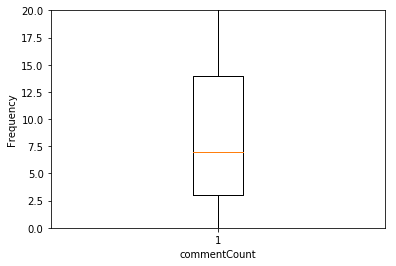

In [16]:
print(input_artical['commentCount'].describe())
plt.boxplot(input_artical['commentCount'])
plt.ylim([0,20]) 
plt.ylabel('Frequency')
plt.xlabel('commentCount')

In [15]:
#留言量
#grouped = input_artical.groupby(["forumName"]).agg({"commentCount": [min, max, sum]}) 
commentCounts_Fgp = input_artical.groupby(["forumName"])["commentCount"].describe()  
commentCounts_Fgp.to_excel("004.2commentCounts_Fgp.xlsx")
commentCounts_Fgp

,count,mean,std,min,25%,50%,75%,max
forumName,,,,,,,,
世新大學,952.0,8.059874,10.677255,0.0,2.00,5.0,11.00,152.0
中原大學,1575.0,12.935873,17.637795,0.0,4.00,8.0,16.00,390.0
中國科大,500.0,8.520000,12.333931,0.0,2.00,5.0,11.00,118.0
中國醫藥大學,241.0,12.456432,11.370978,0.0,5.00,9.0,17.00,61.0
中央大學,726.0,13.946281,16.330336,0.0,5.00,9.0,16.00,176.0
中央警察大學,250.0,16.024000,19.389255,0.0,5.00,11.0,21.00,171.0
中山大學,398.0,9.937186,10.509613,0.0,3.00,7.0,13.00,102.0
中山醫學大學,698.0,7.624642,9.972103,0.0,2.00,5.0,10.00,102.0
中州科大,25.0,8.600000,9.991663,0.0,3.00,6.0,10.00,43.0
